In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from env import host, user, password
import seaborn as sns

def get_db_url(username, hostname, password, database):
    url = f'mysql+pymysql://{username}:{password}@{hostname}/{database}'
    return url


In [47]:
def remove_commas_and_dollarsign(string_num):  
    """ 
    Cleans off a starting $ and commas where-ever they are. Takes a string, returns a string 
    """ 
    
    x = string_num.replace(',','')  
    x = x.strip("$")  
    return float(x)  

In [ ]:
iris = sns.load_dataset('iris')

In [ ]:
sns.boxplot(data=iris, y = 'petal_length')

In [ ]:
sns.distplot(iris.petal_length)

In [ ]:
sns.relplot(x='petal_length', y='petal_width', data=iris)


In [ ]:
sns.relplot(x='sepal_length', y='sepal_width', col='species' ,
            hue='species', data=iris)


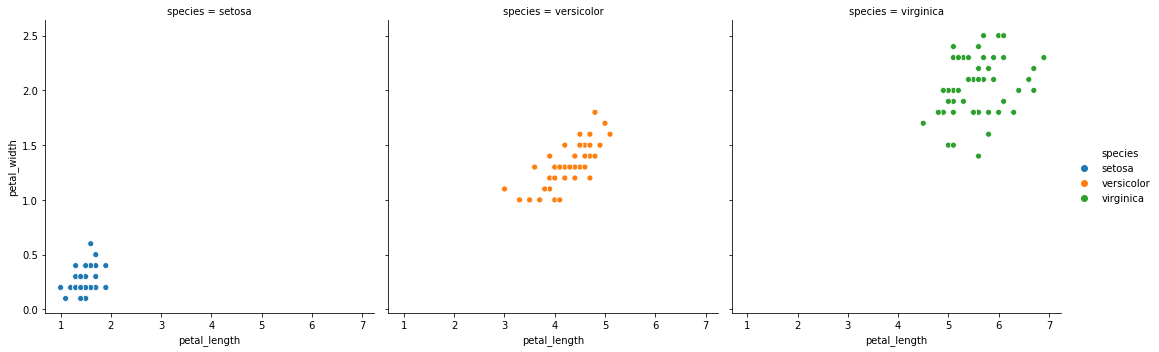

In [7]:
sns.relplot(x='petal_length', y='petal_width', col='species' ,
            hue='species', data=iris)

In [ ]:
anscombe = sns.load_dataset('anscombe')


In [ ]:
anscombe.dtypes

In [ ]:
type(anscombe)

In [ ]:
anscombe.groupby('dataset').x.agg(['min','mean','max'])

In [ ]:
anscombe.groupby('dataset').y.agg(['min','mean','max'])

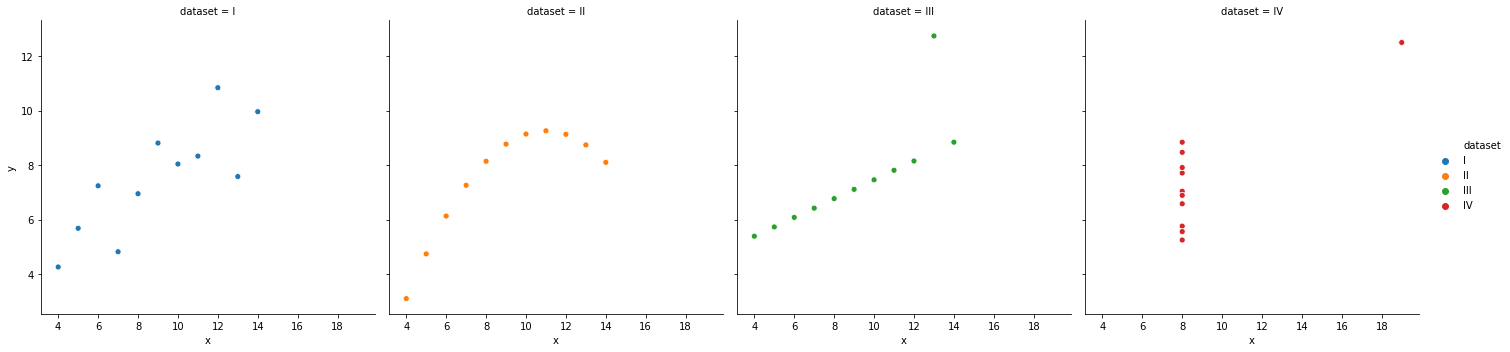

In [13]:
sns.relplot(x='x', y='y', col='dataset' ,
            hue='dataset', data=anscombe)

In [15]:
sprays = pd.read_csv('InsectSprays.csv')

In [16]:
sprays.dtypes

Unnamed: 0     int64
count          int64
spray         object
dtype: object

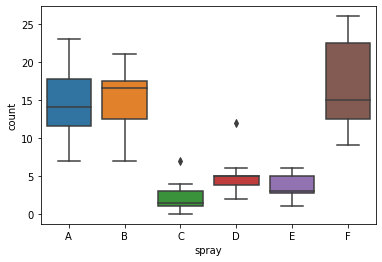

In [17]:
sns.boxplot(data=sprays, y = 'count', x='spray')

In [18]:
swiss = pd.read_csv('swiss.csv')

In [19]:
swiss.dtypes


Unnamed: 0           object
Fertility           float64
Agriculture         float64
Examination           int64
Education             int64
Catholic            float64
Infant.Mortality    float64
dtype: object

In [20]:
swiss.head()


,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
0,Courtelary,80.2,17.0,15,12,9.96,22.2
1,Delemont,83.1,45.1,6,9,84.84,22.2
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2
3,Moutier,85.8,36.5,12,7,33.77,20.3
4,Neuveville,76.9,43.5,17,15,5.16,20.6


In [21]:
swiss['is_Catholic'] = swiss.Catholic > 50

In [22]:
swiss.head()

,Unnamed: 0,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_Catholic
0,Courtelary,80.2,17.0,15,12,9.96,22.2,False
1,Delemont,83.1,45.1,6,9,84.84,22.2,True
2,Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
3,Moutier,85.8,36.5,12,7,33.77,20.3,False
4,Neuveville,76.9,43.5,17,15,5.16,20.6,False


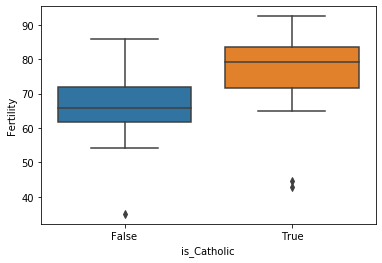

In [23]:
sns.boxplot(x='is_Catholic', y='Fertility', data=swiss)


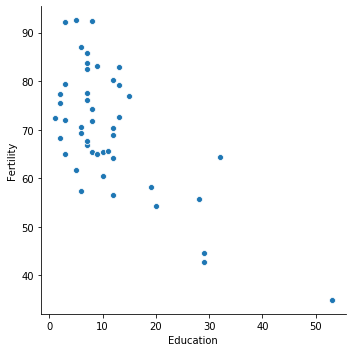

In [24]:
sns.relplot(x='Education', y='Fertility',data=swiss)


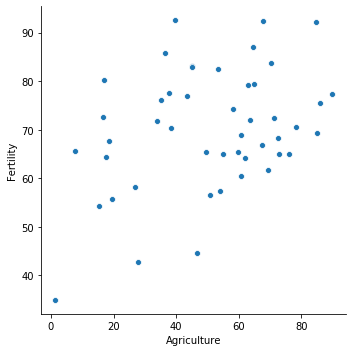

In [25]:
sns.relplot(x='Agriculture', y='Fertility', data=swiss)


In [2]:
db = 'chipotle'

In [3]:
url = get_db_url(user, host, password, db)

In [4]:
chipotle = pd.read_sql_table('orders', url)

In [6]:
chipotle.dtypes

id                     int64
order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object

In [52]:
chipotle['item_price'] = chipotle.item_price.apply(remove_commas_and_dollarsign)

In [59]:
chipotle['total_order'] = chipotle.item_price * chipotle.quantity


In [69]:
item_freq = chipotle.groupby('item_name').total_order.agg(['sum','count'])

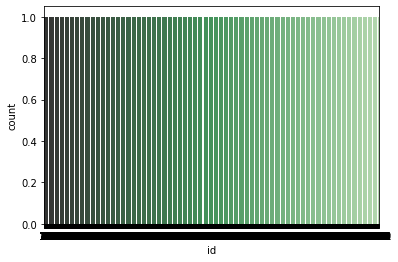

In [95]:
sns.countplot(x="id", data=chipotle, palette="Greens_d")

In [72]:
top5 = item_freq.sort_values(by='sum',ascending=False).head()

In [73]:
top5

,sum,count
item_name,,
Chicken Bowl,8044.63,726
Chicken Burrito,6387.06,553
Steak Burrito,4236.13,368
Steak Bowl,2479.81,211
Chips and Guacamole,2475.62,479


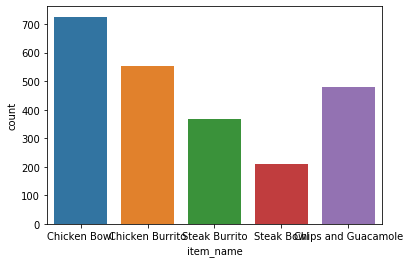

In [80]:
sns.barplot(x=top5.index, y="count", data=top5)

In [82]:
sleep = pd.read_csv('sleep.csv')

In [83]:
sleep.dtypes

Unnamed: 0      int64
extra         float64
group           int64
ID              int64
dtype: object

In [84]:
sleep.head()

,Unnamed: 0,extra,group,ID
0,1,0.7,1,1
1,2,-1.6,1,2
2,3,-0.2,1,3
3,4,-1.2,1,4
4,5,-0.1,1,5


In [87]:
sleep = sleep.set_index('Unnamed: 0')

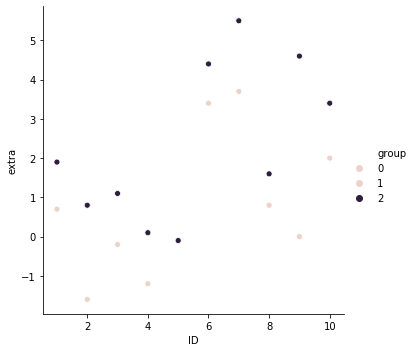

In [90]:
sns.relplot(x='ID', y='extra', hue='group', data=sleep)

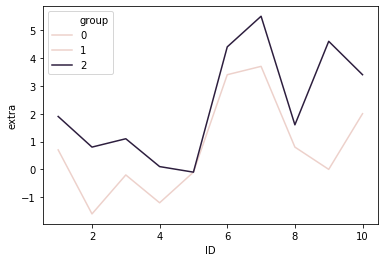

In [99]:
sns.lineplot(x="ID", y="extra", hue="group", data=sleep)